In [1]:
import numpy as np
import src.util as util
from src.linear_model import LinearModel
import matplotlib.pyplot as plt

In [2]:
class LocallyWeightedLinearRegression(LinearModel):
    """Locally Weighted Regression (LWR).

    Example usage:
        > clf = LocallyWeightedLinearRegression(tau)
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def __init__(self, tau):
        super(LocallyWeightedLinearRegression, self).__init__()
        self.tau = tau
        self.x = None
        self.y = None

    def fit(self, x, y):
        """Fit LWR by saving the training set.

        """
        # *** START CODE HERE ***
        self.x = x
        self.y = y
        # *** END CODE HERE ***

    def predict(self, x):
        """Make predictions given inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        l, n = x.shape
 
        weight_matrix = np.exp(- np.linalg.norm(self.x - np.reshape(x, (l, -1, n)), ord=2, axis=2)**2 / (2 * self.tau**2))

        w = np.apply_along_axis(np.diag, axis=1, arr=weight_matrix)

        self.theta = np.linalg.inv(self.x.T @ w @ self.x) @ self.x.T @ w @ self.y

        return np.einsum('ij,ij->i', x, self.theta)

        # *** END CODE HERE ***


In [3]:
ds5_train_path = 'data/ds5_train.csv'
ds5_valid_path = 'data/ds5_valid.csv'
ds5_test_path = 'data/ds5_test.csv'

In [4]:
x_train, y_train = util.load_dataset(ds5_train_path, add_intercept=True)
x_valid, y_valid = util.load_dataset(ds5_valid_path, add_intercept=True)
x_test, y_test = util.load_dataset(ds5_test_path, add_intercept=True)

In [5]:
lwr_model = LocallyWeightedLinearRegression(tau=0.5)

In [6]:
lwr_model.fit(x_train, y_train)

In [7]:
y_pred = lwr_model.predict(x_train)

In [8]:
def plot(x, y_label, y_pred, title):
    plt.figure()
    plt.plot(x[:,-1], y_label, 'bx', label='label')
    plt.plot(x[:,-1], y_pred, 'ro', label='prediction')
    plt.suptitle(title, fontsize=12)
    plt.legend(loc='upper left')

In [9]:
def print_MSE(y_true, y_pred):
    print(f"MSE: {np.mean((y_true - y_pred) * (y_true - y_pred))}")

MSE: 0.32535235950212127


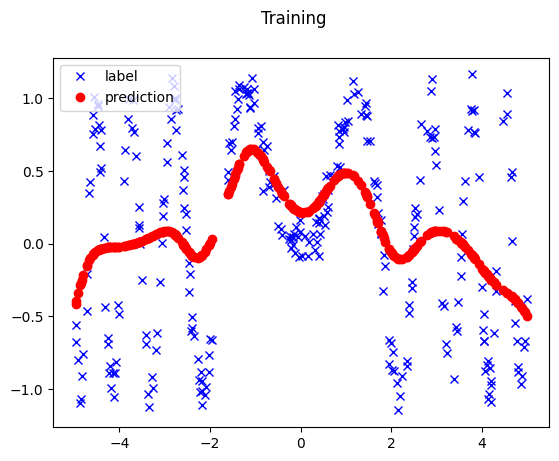

In [10]:
plot(x=x_train, y_label=y_train, y_pred=y_pred, title="Training")
print_MSE(y_train, y_pred)

MSE: 0.3305312682137523


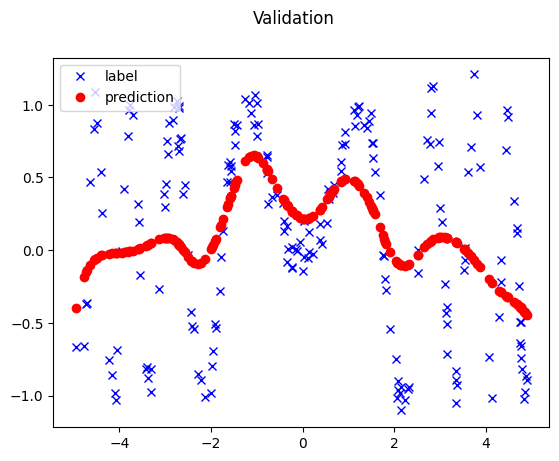

In [11]:
y_valid_pred = lwr_model.predict(x_valid)
plot(x_valid, y_valid, y_valid_pred, "Validation")
print_MSE(y_valid, y_valid_pred)

In [12]:
taus = np.array([0.03, 0.04, 0.05, 0.1, 0.5])

Tau: 0.03
MSE: 0.005254817960248565
Tau: 0.04
MSE: 0.006699540174581522
Tau: 0.05
MSE: 0.008170355916900985
Tau: 0.1
MSE: 0.021758348267221197
Tau: 0.5
MSE: 0.32535235950212127


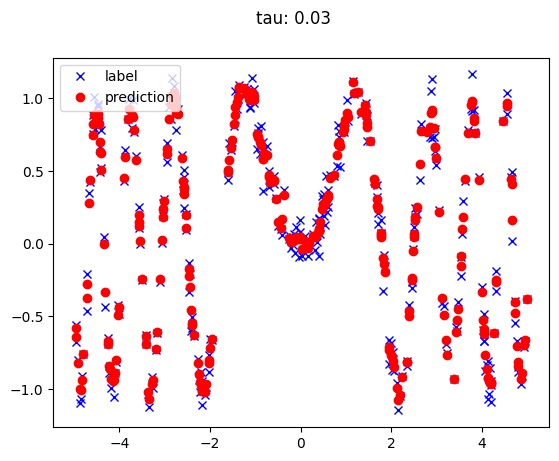

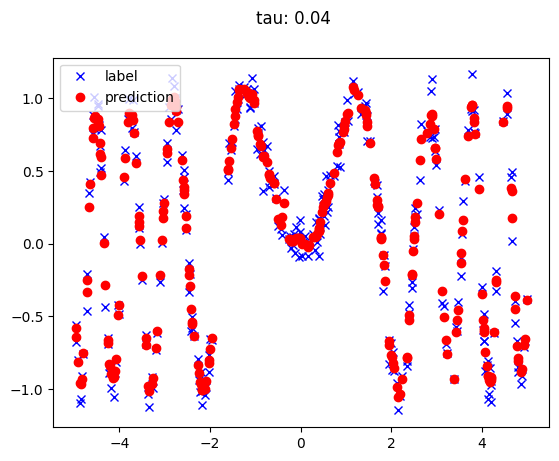

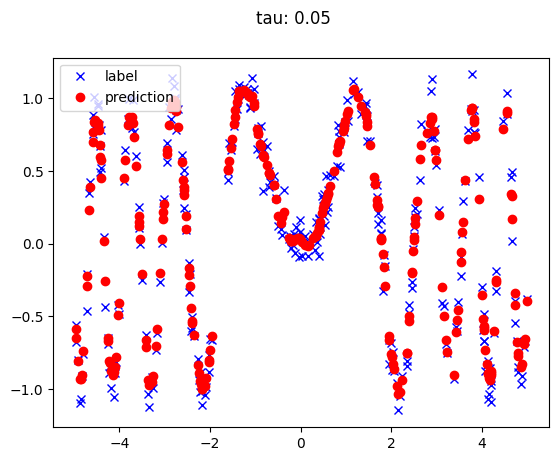

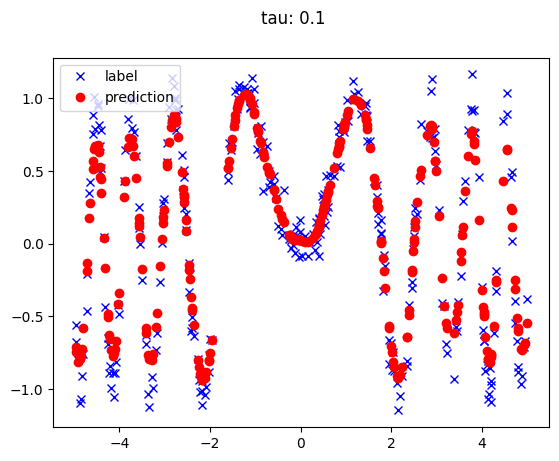

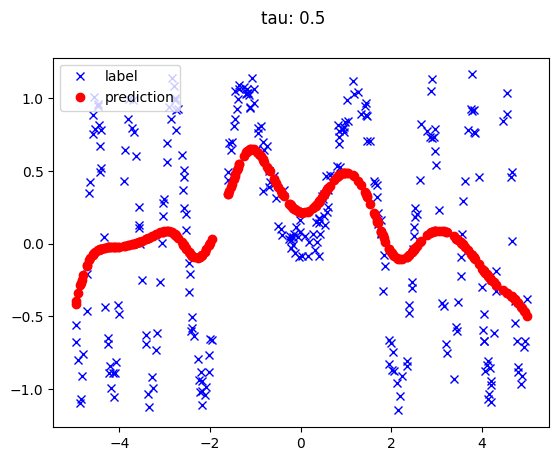

In [13]:
for tau in taus:
    lwr_model_test = LocallyWeightedLinearRegression(tau)

    lwr_model_test.fit(x_train, y_train)

    y_pred_test = lwr_model_test.predict(x_train)

    plot(x_train, y_train, y_pred_test, f"tau: {tau}")
    print(f'Tau: {tau}')
    print_MSE(y_train, y_pred_test)